# Explanatory Analysis

Set up libraries

In [1]:
import scipy
from datetime import date
import polars as pl
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, interactive
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import plotly.io as pio
pio.templates.default = 'plotly_white'


In [3]:
data_link = "./Data/data.csv"
df = pl.read_csv(data_link).with_columns(pl.col('week_start').cast(pl.Date)).sort('week_start')

df.head(4)

week_start,new_customers,promo_investment,ppc_brand_investment,ppc_generic_investment,facebook_investment,instagram_investment,year,week,promo_investment_lag0,ppc_brand_investment_lag0,ppc_generic_investment_lag3,facebook_investment_lag2,instagram_investment_lag6,time,sin_52_1,cos_52_1,sin_52_2,cos_52_2
date,i64,f64,f64,f64,f64,f64,i64,i64,f64,f64,f64,f64,f64,i64,f64,f64,f64,f64
2020-05-18,777,1304.227029,756.818857,1512.071585,297.193399,4593.059512,2020,21,1304.227029,756.818857,2300.295763,999.081772,82.890357,113,0.885456,0.464723,0.822984,-0.568065
2020-05-25,978,3000.504127,69.654279,399.82446,0.0,792.564928,2020,22,3000.504127,69.654279,4268.329032,637.97411,1246.32403,114,0.935016,0.354605,0.663123,-0.748511
2020-06-01,950,4609.816216,357.467625,471.992936,1769.420849,3281.127107,2020,23,4609.816216,357.467625,4219.098648,297.193399,1969.201111,115,0.970942,0.239316,0.464723,-0.885456
2020-06-08,800,3429.065037,425.663469,1181.626485,2353.024023,4510.560793,2020,24,3429.065037,425.663469,1512.071585,0.0,2889.605271,116,0.992709,0.120537,0.239316,-0.970942


### Quality Check 	✅

In [4]:
def check_complete_datarange(df: pl.DataFrame,
                             date_col: str = 'week_start'):

  min_date = df.select(pl.col(date_col).min()).item()
  max_date = df.select(pl.col(date_col).max()).item()
  date_range = pl.date_range(start=min_date, end=max_date, interval="1w",
                             eager=True).to_list()
  print(set(date_range))
  assert set(date_range) == set(df[date_col].to_list())


In [5]:
check_complete_datarange(df)

{datetime.date(2020, 7, 13), datetime.date(2021, 8, 30), datetime.date(2023, 5, 1), datetime.date(2022, 6, 6), datetime.date(2020, 10, 5), datetime.date(2022, 2, 21), datetime.date(2022, 12, 26), datetime.date(2020, 8, 3), datetime.date(2023, 6, 12), datetime.date(2020, 11, 16), datetime.date(2022, 1, 24), datetime.date(2023, 1, 23), datetime.date(2023, 7, 10), datetime.date(2020, 6, 1), datetime.date(2021, 4, 5), datetime.date(2021, 4, 12), datetime.date(2022, 11, 28), datetime.date(2022, 5, 9), datetime.date(2021, 2, 8), datetime.date(2022, 12, 5), datetime.date(2021, 10, 11), datetime.date(2023, 1, 2), datetime.date(2020, 6, 22), datetime.date(2020, 12, 28), datetime.date(2022, 8, 22), datetime.date(2020, 7, 6), datetime.date(2022, 9, 19), datetime.date(2022, 10, 17), datetime.date(2021, 5, 31), datetime.date(2021, 6, 28), datetime.date(2021, 11, 8), datetime.date(2023, 6, 5), datetime.date(2020, 7, 27), datetime.date(2022, 2, 7), datetime.date(2023, 2, 13), datetime.date(2023, 4, 1

In [6]:
df.describe()

statistic,week_start,new_customers,promo_investment,ppc_brand_investment,ppc_generic_investment,facebook_investment,instagram_investment,year,week,promo_investment_lag0,ppc_brand_investment_lag0,ppc_generic_investment_lag3,facebook_investment_lag2,instagram_investment_lag6,time,sin_52_1,cos_52_1,sin_52_2,cos_52_2
str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""","""165""",165.0,165.0,165.0,165.0,165.0,165.0,165.0,165.0,165.0,165.0,165.0,165.0,165.0,165.0,165.0,165.0,165.0,165.0
"""null_count""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""","""2021-12-13 00:00:00""",3398.975758,35216.521211,5496.701942,37445.293314,13813.534096,16204.869247,2021.454545,26.563636,35216.521211,5496.701942,37307.976487,13767.98898,16081.253734,195.0,0.051929,-8.6126e-17,4.3063e-17,-0.044521
"""std""",null,2208.639314,55714.064409,5295.138163,23772.808311,8284.566551,11983.849211,0.996669,14.798356,55714.064409,5295.138163,23937.333344,8343.324914,12096.280239,47.775517,0.723002,0.693291,0.701829,0.71522
"""min""","""2020-05-18""",320.0,484.0,69.654279,399.82446,0.0,0.0,2020.0,1.0,484.0,69.654279,399.82446,0.0,0.0,113.0,-1.0,-1.0,-0.992709,-1.0
"""25%""","""2021-03-01""",1662.0,8515.0,1830.974019,19429.80101,7388.0,5900.0,2021.0,14.0,8515.0,1830.974019,19429.80101,7388.0,5354.514221,154.0,-0.663123,-0.663123,-0.663123,-0.748511
"""50%""","""2021-12-13""",2833.0,14504.66397,3425.11993,33847.03069,13258.35732,14081.5304,2021.0,26.0,14504.66397,3425.11993,33847.03069,13258.35732,14081.5304,195.0,0.120537,-4.9000e-16,-9.8100e-16,-0.120537
"""75%""","""2022-09-26""",4794.0,25770.0,7012.0,53816.70628,18255.53632,23265.71406,2022.0,39.0,25770.0,7012.0,53816.70628,18255.53632,23265.71406,236.0,0.822984,0.663123,0.663123,0.748511
"""max""","""2023-07-10""",10473.0,299133.0888,25214.46475,119401.1149,39643.39486,50198.16966,2023.0,53.0,299133.0888,25214.46475,119401.1149,39643.39486,50198.16966,277.0,1.0,1.0,0.992709,1.0


### Know your target ⭕

In [7]:
df.columns

['week_start',
 'new_customers',
 'promo_investment',
 'ppc_brand_investment',
 'ppc_generic_investment',
 'facebook_investment',
 'instagram_investment',
 'year',
 'week',
 'promo_investment_lag0',
 'ppc_brand_investment_lag0',
 'ppc_generic_investment_lag3',
 'facebook_investment_lag2',
 'instagram_investment_lag6',
 'time',
 'sin_52_1',
 'cos_52_1',
 'sin_52_2',
 'cos_52_2']

In [8]:
target = "new_customers"
date_col = 'week_start'
channels = ['promo_investment',
            'ppc_brand_investment',
            'ppc_generic_investment',
            'facebook_investment',
            'instagram_investment']

### Trend Analysis 📈

In [9]:
rolling_window_widget = widgets.IntSlider(value=1,
    min=1,
    max=40,
    step=1,
    description='Window')


def update_rolling_plot(window):

  base_title = f"{target} Evolution Over Time"
  title = base_title if window == 1 else base_title +  f"- Rolling Mean (Window = {window})"

  rolled_df = df.with_columns(pl.col(target).rolling_mean(window))
  fig = px.line(rolled_df, x=date_col, y=target,
                title=title)
  #fig.update_layout(width=1300, height=400)
  fig.show(renderer="colab")

interactive_plot = interactive(update_rolling_plot,
                               window=rolling_window_widget)

display(interactive_plot)

interactive(children=(IntSlider(value=1, description='Window', max=40, min=1), Output()), _dom_classes=('widge…

🔍 Observations <br>
⬛ Increasing trend over time, except in 2023, where sales show a decline. <br>
⬛ Presence of seasonality.

### Seasonality Analysis 📈

In [10]:
fig = px.line(df.with_columns(pl.col(target).rolling_mean(5)),
        x='week',
        y=target,
        color = 'year',
        hover_data=[date_col],
        title='New Customers Comparison Over Years')

fig.show()

🔍 Observations 

⬛ In 2020, the summer spike in new customers begins at the end of July. <br>
⬛ In 2021, the summer spike shifts earlier, starting at the end of May. <br>
⬛ In 2022, the summer spike occurs even earlier, at the beginning of May. <br>
⬛ In 2023, an unusual decrease in new customers is observed at the beginning of June. <br>
⬛ This pattern suggests that a potential yearly seasonality is disrupted by the lingering effects of COVID and an anomalous event in 2023, making it less clean.

In [11]:
def compute_autocorrelation(df: pl.DataFrame,
                              col_name: str,
                              max_lag: int = 60,
                              sort_col: str = None) -> pl.DataFrame:
    # Optional sorting
    if sort_col:
        df = df.sort(sort_col)

    # Compute autocorrelations for each lag
    corrs = []
    for lag in range(0, max_lag + 1):
        shifted_df = df.with_columns(pl.col(col_name).shift(lag).alias(f"{col_name}_lag"))
        corr_value = shifted_df.drop_nulls().select(pl.corr(col_name, f"{col_name}_lag")).item()
        corrs.append(corr_value)

    # Return the results as a Polars DataFrame
    return pl.DataFrame({
        'Lag': range(0, max_lag + 1),
         col_name: corrs
    })


result = compute_autocorrelation(df, col_name=target, max_lag=60, sort_col=date_col)
fig=px.line(result, x='Lag', y=target, title=f"{target} - Autocorrelation Function")
fig.update_layout(yaxis_title="Correlation")
fig.show()

🔍 Observations <br>

The prominent correlation peak at lag 52 further confirms the presence of yearly seasonality. 

### New customers 💁‍♀️💁‍♂️ vs. Investments 💰

Timing matters ⏰

In [12]:
def scale_columns_expr(col_names: list[str]) -> pl.Expr:
  return [((pl.col(col) - pl.col(col).min()) / (pl.col(col).max() - pl.col(col).min())).alias(f"{col}_scaled")
          for col in col_names]


def shift_col_expr(col_names: list[str], lag: int) -> pl.Expr:
  return [pl.col(col).shift(lag).alias(col) for col in col_names]


def add_season_column(df: pl.DataFrame, date_col: str,
                      new_col: str = "season") -> pl.DataFrame:

    return df.with_columns(
        pl.when(pl.col(date_col).dt.month().is_in([12, 1, 2]))
        .then(pl.lit("Winter"))
        .when(pl.col(date_col).dt.month().is_in([3, 4, 5]))
        .then(pl.lit("Spring"))
        .when(pl.col(date_col).dt.month().is_in([6, 7, 8]))
        .then(pl.lit("Summer"))
        .otherwise(pl.lit("Autumn"))
        .alias(new_col)
    )

In [13]:
def plot_target_channel_relationship(df: pl.DataFrame,
                                     col_to_scale: str,
                                     col_to_corr: str,
                                     plot_title: str,
                                     target: str = target,
                                     ) -> None:
  df_scaled = df.with_columns(scale_columns_expr([target, col_to_scale]))
  corr_coeff = df_scaled.select(pl.corr(target, col_to_corr)).item()
  corr_coeff = np.round(corr_coeff, 2)


  fig = make_subplots(rows=1, cols=2, subplot_titles=("Normalized Line Plot",
                                                      f"Scatter Plot - Corr: {corr_coeff}"))

  fig.add_trace(
      go.Scatter(x=df_scaled[date_col].to_list(),
                 y=df_scaled[f"{target}_scaled"].to_list(),
                 mode='lines', name=target),
      row=1, col=1
  )
  fig.add_trace(
      go.Scatter(x=df_scaled[date_col].to_list(),
                 y=df_scaled[f"{col_to_scale}_scaled"].to_list(),
                 mode='lines', name=col_to_scale),
      row=1, col=1
  )
  fig.add_trace(
      go.Scatter(x=df_scaled[col_to_corr].to_list(),
                 y=df_scaled[target].to_list(),
                 mode='markers', showlegend=False),
      row=1, col=2
  )

  fig.update_layout(
      title=plot_title
  )
  fig.show()

In [14]:
lag_widget = widgets.IntSlider(value=0,
    min=0,
    max=8,
    step=1,
    description='Lag')

channels_dropdown = widgets.Dropdown(description='Channel', options=channels)
def plot_target_channel_relationship_on_lag_change(channel: str,
                                                   lag: int):

    df_shifted = (
        df
        .sort(date_col)
        .with_columns(shift_col_expr([channel], lag))
        .filter(pl.col(channel).is_not_null())

    )

    plot_title = f"{target} vs {channel} Relationship - Lag {lag}"
    plot_target_channel_relationship(df_shifted,
                                     col_to_scale=channel,
                                     col_to_corr=channel,
                                     plot_title=plot_title)

In [15]:
interactive_relationship_plot = interactive(plot_target_channel_relationship_on_lag_change,
                                            channel = channels_dropdown,
                                            lag=lag_widget
                                            )

display(interactive_relationship_plot)

interactive(children=(Dropdown(description='Channel', options=('promo_investment', 'ppc_brand_investment', 'pp…

🔍 Observations <br>

⬛ 🧐: the target saturates beyond a certain threshold of investment, indicating diminishing returns. <br>
⬛ For all other channels, except PPC brand, we observe a stronger correlation when the investments are lagged, suggesting a delayed effect on the target. <br>
⬛ Additionally, in most cases, the relationship between investments and the target is not perfectly linear, highlighting the need for transformations or advanced modeling techniques to capture these dynamics effectively.

### Quantitative Analysis - Cross Correlation 
⬛ Cross Correlation <br>
⬛ Spearman Correlation

In [16]:
def compute_cross_correlation(df: pl.DataFrame,
                              target: str,
                              feature: str,
                              max_lag: int,
                              corr_method: str
                              ) -> pl.DataFrame:

    corrs = []
    for lag in range(0, max_lag + 1):
        shifted_df = df.with_columns(pl.col(feature).shift(lag).alias(f"{feature}_lag"))
        corr_value = shifted_df.drop_nulls().select(pl.corr(target, f"{feature}_lag",
                                                            method=corr_method)).item()
        corrs.append(corr_value)

    return pl.DataFrame({
        'Lag': range(0, max_lag + 1),
         feature: corrs
    })


def get_cross_correlation_df(df: pl.DataFrame,
                             target: str = target,
                             channels: list[str] = channels,
                             max_lag: int = 12,
                             sort_col: str = date_col,
                             corr_method: str = 'pearson'):

  sorted_df = df.sort(sort_col)
  cross_correlations_list = []
  for channel in channels:
    sel_df = sorted_df.select(target, channel)
    cross_correlations_list.append(
        compute_cross_correlation(sel_df, target, channel,
                                  max_lag, corr_method)
    )

  return pl.concat(cross_correlations_list, how="align")

In [17]:
spearman_cross_corr_df = get_cross_correlation_df(df, corr_method='spearman')
pearson_cross_corr_df = get_cross_correlation_df(df, corr_method='pearson')

In [18]:
fig=px.line(pearson_cross_corr_df, x='Lag', y=channels, title="Pearson Cross Correlation")
fig.show()

In [19]:
fig=px.line(spearman_cross_corr_df, x='Lag', y=channels, title="Spearman Cross Correlation")
fig.show()
     

🔍 Observations <br>

⬛ PPC --> immediate effect <br>
⬛ Instagram --> latency <br>

In [20]:
def get_best_lag(cross_correlation_df: pl.DataFrame,
                 lag_col: str = 'Lag') -> dict[str, int]:

  channels = [col for col in cross_correlation_df.columns if
              col != lag_col]
  lag_dict = {}
  for channel in channels:
    best_lag = (
        cross_correlation_df
        .filter(pl.col(channel) == pl.max(channel))
        .select(lag_col).item()
    )
    lag_dict[channel] = best_lag

  return lag_dict

In [21]:
spearman_lag_dict = get_best_lag(spearman_cross_corr_df)
spearman_lag_dict

{'promo_investment': 0,
 'ppc_brand_investment': 0,
 'ppc_generic_investment': 3,
 'facebook_investment': 2,
 'instagram_investment': 6}

In [22]:
pearson_lag_dict = get_best_lag(pearson_cross_corr_df)
pearson_lag_dict

{'promo_investment': 0,
 'ppc_brand_investment': 1,
 'ppc_generic_investment': 3,
 'facebook_investment': 3,
 'instagram_investment': 9}

In [23]:
chosen_lag_dict = spearman_lag_dict

In [24]:
lagged_channels_names = [f"{channel}_lag{lag}" for channel, lag in chosen_lag_dict.items()]

In [25]:
def lag_channels_at_best_lag(df: pl.DataFrame, best_lag_dict: dict[str, int],
                             sort_col: str = date_col) -> pl.DataFrame:
  lagged_df = df.sort(sort_col)
  for channel, lag in best_lag_dict.items():
    lagged_df = lagged_df.with_columns(pl.col(channel).shift(lag).alias(f"{channel}_lag{lag}"))
  return lagged_df

In [26]:
lagged_df = lag_channels_at_best_lag(df, chosen_lag_dict)
lagged_df.head()

week_start,new_customers,promo_investment,ppc_brand_investment,ppc_generic_investment,facebook_investment,instagram_investment,year,week,promo_investment_lag0,ppc_brand_investment_lag0,ppc_generic_investment_lag3,facebook_investment_lag2,instagram_investment_lag6,time,sin_52_1,cos_52_1,sin_52_2,cos_52_2
date,i64,f64,f64,f64,f64,f64,i64,i64,f64,f64,f64,f64,f64,i64,f64,f64,f64,f64
2020-05-18,777,1304.227029,756.818857,1512.071585,297.193399,4593.059512,2020,21,1304.227029,756.818857,null,null,null,113,0.885456,0.464723,0.822984,-0.568065
2020-05-25,978,3000.504127,69.654279,399.82446,0.0,792.564928,2020,22,3000.504127,69.654279,null,null,null,114,0.935016,0.354605,0.663123,-0.748511
2020-06-01,950,4609.816216,357.467625,471.992936,1769.420849,3281.127107,2020,23,4609.816216,357.467625,null,297.193399,null,115,0.970942,0.239316,0.464723,-0.885456
2020-06-08,800,3429.065037,425.663469,1181.626485,2353.024023,4510.560793,2020,24,3429.065037,425.663469,1512.071585,0.0,null,116,0.992709,0.120537,0.239316,-0.970942
2020-06-15,320,6679.522877,530.894558,1962.369223,2351.488377,3760.098884,2020,25,6679.522877,530.894558,399.82446,1769.420849,null,117,1.0,5.5100e-16,1.1000e-15,-1.0


### Seasonal Effects 🌻 🌞 🍃 ❄

In [27]:
season_df = add_season_column(lagged_df, date_col=date_col)

season_channels_dropdown = widgets.Dropdown(description='Channel',
                                            options=lagged_channels_names)

def plot_seasonal_effect(channel: str):


  fig = px.scatter(
      season_df,
      x=channel,
      y=target,
      color="season",
      facet_col="season",
      title=f"{channel} vs Sales by Season",
      height=400,
      width=1300
  )
  fig.show()


interactive_seasonal_plot = interactive(plot_seasonal_effect,
                                        channel = season_channels_dropdown,
                                        )

display(interactive_seasonal_plot)

interactive(children=(Dropdown(description='Channel', options=('promo_investment_lag0', 'ppc_brand_investment_…

🔍 Observations <br>

⬛ The promo investment saturates in every season of the year <br>
⬛ The PPC brand investments show a saturation effect during the summer <br>
⬛ For the other channels in autum or winter we lose a monotonic relationship with the target <br>

### How To Manage Non-Linear Relationships? 🧐

Geometric Adstock :

$$
Adstock_{t} = Spend_{t} + \lambda \cdot Adstock_{t-1}
$$

In [28]:
def geometric_adstock(investment_series: np.typing.ArrayLike,
                      decay_rate: float) -> np.array:
    if not (0 <= decay_rate < 1):
        raise ValueError("Decay factor must be between 0 and 1.")

    transformed = np.zeros_like(investment_series)
    transformed[0] = investment_series[0]

    for i in range(1, len(investment_series)):
        transformed[i] = investment_series[i] + decay_rate * transformed[i - 1]
    return transformed

In [29]:
decay_rate_widget = widgets.FloatSlider(min=0, max=0.99, step=0.01)
lagged_channels_dropdown = widgets.Dropdown(description='Delayed Channel', options=lagged_channels_names)

def plot_adstock_transformation(channel: str, decay_rate: int):

  sel_df = lagged_df.select(date_col, target, channel).drop_nulls()
  adstock_investment = geometric_adstock(sel_df[channel].to_list(),
                                         decay_rate)

  adstock_channel_name = f"{channel}_adstock"
  adstock_df = sel_df.with_columns(
      pl.Series(name=adstock_channel_name, values=adstock_investment))

  plot_title = f"{target} vs Adstock {channel} Relationship - Decay Rate {np.round(decay_rate, 2)}"
  plot_target_channel_relationship(adstock_df,
                                   col_to_scale=adstock_channel_name,
                                   col_to_corr=adstock_channel_name,
                                   plot_title=plot_title)

In [30]:
interactive_adstock_plot = interactive(plot_adstock_transformation,
                                        channel=lagged_channels_dropdown,
                                        decay_rate=decay_rate_widget
                                      )

display(interactive_adstock_plot)

interactive(children=(Dropdown(description='Delayed Channel', options=('promo_investment_lag0', 'ppc_brand_inv…

### Optimal Decay Rate and Half-Life Estimation 🕙

In [31]:
def find_optimal_correlation_decay_rate(investments_series: np.typing.ArrayLike,
                                        target: np.typing.ArrayLike,
                                        max_decay_rate: float = 0.8) -> list[float]:
    corrs = []
    rates = np.arange(0, max_decay_rate, 0.001)
    rmax = 0
    corrmax = -1

    for r in rates:
        x = geometric_adstock(investments_series, r)
        y = target
        corr = np.corrcoef(x, y)[0][1]
        corrs.append(corr)
        if corr > corrmax:
            rmax = r
            corrmax = corr
    return [rmax, corrmax]


def calculate_half_life(decay_rate: float) -> float:
  return np.round(np.log(0.5) / np.log(decay_rate), 2)


def get_half_life_df(df: pl.DataFrame, col_names: list[str],
                     target: str = target,
                     sort_col: str = date_col) -> pl.DataFrame:

  rates = []
  half_lifes = []
  corrs = []
  ad_corrs = []
  for col in col_names:
    sel_df = df.select(target, col).drop_nulls()
    corr = df.select(pl.corr(target, col)).item()
    corrs.append(corr)
    rate = find_optimal_correlation_decay_rate(sel_df[col].to_list(),
                                               sel_df[target].to_list()
                                               )
    half_life = calculate_half_life(rate[0])
    rates.append(rate[0])
    half_lifes.append(half_life)
    ad_corrs.append(rate[1])

  return (
      pl.DataFrame()
      .with_columns(
          pl.Series(name='Delayed Channel', values=col_names),
          pl.Series(name='Decay Rate', values=rates),
          pl.Series(name='Half Life [Week]', values=half_lifes),
          pl.Series(name='Adstock Corr', values=ad_corrs).round(2),
          pl.Series(name='Corr', values=corrs).round(2),
      )
  )

In [32]:
half_life_df = get_half_life_df(lagged_df, lagged_channels_names)
half_life_df

Delayed Channel,Decay Rate,Half Life [Week],Adstock Corr,Corr
str,f64,f64,f64,f64
"""promo_investment_lag0""",0.018,0.17,0.75,0.75
"""ppc_brand_investment_lag0""",0.542,1.13,0.86,0.84
"""ppc_generic_investment_lag3""",0.799,3.09,0.7,0.63
"""facebook_investment_lag2""",0.799,3.09,0.75,0.62
"""instagram_investment_lag6""",0.743,2.33,0.82,0.75


Transforming The Promo Investment 🪄

In [33]:
saturation_col = 'promo_investment'


def log_transformation(x: np.ndarray) -> np.ndarray:
    return np.log(x + 1)


def root_transformation(x: np.ndarray, beta: float) -> np.ndarray:
    if not (0 < beta <= 1):
        raise ValueError("Beta must be in the range (0, 1].")
    return x**beta


def logistic_transformation(x: np.ndarray, beta: float) -> np.ndarray:
  x_norm = (x-np.min(x))/(np.max(x)-np.min(x))
  if beta < 0:
    raise ValueError("Beta must be greater than zero")
  return (1 - np.exp(-beta * x_norm)) / (1 + np.exp(-beta * x_norm))

In [34]:
plot_title = f"{target} vs {saturation_col} Relationship"
plot_target_channel_relationship(lagged_df,
                                 col_to_scale=saturation_col,
                                 col_to_corr=saturation_col,
                                 plot_title=plot_title)

In [35]:
saturated_col_name = f"{saturation_col}_transformed"

saturation_df = df.select(date_col, target, saturation_col).sort(date_col)
log_col = log_transformation(saturation_df[saturation_col].to_numpy())
saturation_df = saturation_df.with_columns(
      pl.Series(name=saturated_col_name, values=log_col)
  )

plot_title = f"{target} vs Log {saturation_col} Relationship"
plot_target_channel_relationship(saturation_df,
                                 col_to_scale=saturated_col_name,
                                 col_to_corr=saturated_col_name,
                                 plot_title=plot_title)

In [36]:
logistic_param_widget = widgets.FloatSlider(min=0.01, max=10, step=0.01)

def plot_logistic_transformation_beta_change(beta: float):

  logistic_df = df.select(date_col, target, saturation_col).sort(date_col)
  logistic_col = logistic_transformation(
      logistic_df[saturation_col].to_numpy(),
      beta)
  logistic_df = logistic_df.with_columns(
      pl.Series(name=saturated_col_name, values=logistic_col)
  )

  beta_param = np.round(logistic_param_widget.value, 2)
  plot_title = f"{target} vs Logistic {saturation_col} Relationship - Beta: {beta_param} "
  plot_target_channel_relationship(logistic_df,
                                   col_to_scale=saturated_col_name,
                                   col_to_corr=saturated_col_name,
                                   plot_title=plot_title)

In [37]:
interactive_logistic_plot = interactive(plot_logistic_transformation_beta_change,
                                        beta=logistic_param_widget
                                        )

display(interactive_logistic_plot)

interactive(children=(FloatSlider(value=0.01, description='beta', max=10.0, min=0.01, step=0.01), Output()), _…

In [38]:
root_param_widget = widgets.FloatSlider(min=0.001, max=1, step=0.001)

def plot_root_transformation_beta_change(beta: float):

  root_df = df.select(date_col, target, saturation_col).sort(date_col)
  root_col = root_transformation(
      root_df[saturation_col].to_numpy(),
      beta)
  root_df = root_df.with_columns(
      pl.Series(name=saturated_col_name, values=root_col)
  )

  beta_param = np.round(beta, 3)
  plot_title = f"{target} vs Root {saturation_col} Relationship - Beta: {beta_param} "
  plot_target_channel_relationship(root_df,
                                   col_to_scale=saturated_col_name,
                                   col_to_corr=saturated_col_name,
                                   plot_title=plot_title)

In [39]:
interactive_root_plot = interactive(plot_root_transformation_beta_change,
                                        beta=root_param_widget
                                        )

display(interactive_root_plot)

interactive(children=(FloatSlider(value=0.001, description='beta', max=1.0, min=0.001, step=0.001), Output()),…

### It's Model Time! 💃

In [40]:
DAWN_OF_TIME = date(2018, 3, 16)


def build_harmonics(df: pl.DataFrame, period: int, n_harms: int,
                    date_col: str = 'week_start') -> pl.DataFrame:
    if 'time' not in df.columns:
        df = df.with_columns(
            ((pl.col(date_col) - DAWN_OF_TIME).dt.total_days() // 7).alias('time')
        )

    # Add sine and cosine harmonics
    for i in range(1, n_harms + 1):
        df = df.with_columns([
            (np.sin(2 * np.pi * i / period * pl.col('time'))).alias(f'sin_{period}_{i}'),
            (np.cos(2 * np.pi * i / period * pl.col('time'))).alias(f'cos_{period}_{i}')
        ])

    return df

In [41]:
regression_df = lagged_df.clone()
regression_df = regression_df.sort(date_col).drop_nulls()
regression_df = build_harmonics(regression_df, period=52, n_harms=2)
regression_df = regression_df.drop_nulls().sort(date_col)
regression_df.head()

week_start,new_customers,promo_investment,ppc_brand_investment,ppc_generic_investment,facebook_investment,instagram_investment,year,week,promo_investment_lag0,ppc_brand_investment_lag0,ppc_generic_investment_lag3,facebook_investment_lag2,instagram_investment_lag6,time,sin_52_1,cos_52_1,sin_52_2,cos_52_2
date,i64,f64,f64,f64,f64,f64,i64,i64,f64,f64,f64,f64,f64,i64,f64,f64,f64,f64
2020-06-29,446,4283.941316,163.599912,3409.906904,5034.139691,7252.096261,2020,27,4283.941316,163.599912,1181.626485,2351.488377,4593.059512,119,0.970942,-0.239316,-0.464723,-0.885456
2020-07-06,764,7952.993927,131.742894,6006.420011,7480.250899,7751.358813,2020,28,7952.993927,131.742894,1962.369223,5352.093706,792.564928,120,0.935016,-0.354605,-0.663123,-0.748511
2020-07-13,997,5098.959267,320.576875,7803.252636,13020.01212,11572.21548,2020,29,5098.959267,320.576875,971.45887,5034.139691,3281.127107,121,0.885456,-0.464723,-0.822984,-0.568065
2020-07-20,1430,6053.497166,512.642013,11362.36704,13247.68606,12050.97701,2020,30,6053.497166,512.642013,3409.906904,7480.250899,4510.560793,122,0.822984,-0.568065,-0.935016,-0.354605
2020-07-27,879,2475.935486,739.987066,13460.3604,13434.57924,10765.7933,2020,31,2475.935486,739.987066,6006.420011,13020.01212,3760.098884,123,0.748511,-0.663123,-0.992709,-0.120537


In [42]:
cos_sin_columns = [col for col in regression_df.columns if 'sin' in col or 'cos' in col]
px.line(regression_df, x='week_start', y=cos_sin_columns, title='Harmonics')

In [43]:
half_life_df

Delayed Channel,Decay Rate,Half Life [Week],Adstock Corr,Corr
str,f64,f64,f64,f64
"""promo_investment_lag0""",0.018,0.17,0.75,0.75
"""ppc_brand_investment_lag0""",0.542,1.13,0.86,0.84
"""ppc_generic_investment_lag3""",0.799,3.09,0.7,0.63
"""facebook_investment_lag2""",0.799,3.09,0.75,0.62
"""instagram_investment_lag6""",0.743,2.33,0.82,0.75


In [44]:
adstock_params = {
    "ppc_brand_investment_lag0": 0.55,
    "ppc_generic_investment_lag3": 0.8,
    "facebook_investment_lag2": 0.8,
    "instagram_investment_lag6": 0.75
}

saturation_param = 0.26
rename_dict = {
    "promo_investment_lag0": "promo_regressor",
    "ppc_brand_investment_lag0": "brand_regressor",
    "ppc_generic_investment_lag3": "generic_regressor",
    "facebook_investment_lag2": "facebook_regressor",
    "instagram_investment_lag6": "instagram_regressor"
}

In [45]:
# Transform Marketing Investments

regression_df = regression_df.with_columns(
    pl.Series(name=rename_dict["promo_investment_lag0"],
              values=root_transformation(regression_df["promo_investment_lag0"].to_numpy(), beta=saturation_param))

    )


for channel, param in adstock_params.items():
  regression_df = regression_df.with_columns(
      pl.Series(name=rename_dict[channel],
                values=geometric_adstock(regression_df[channel].to_numpy(), decay_rate=param))

      )

In [46]:
regressors = ['time',
 'sin_52_1',
 'cos_52_1',
 'sin_52_2',
 'cos_52_2',
 'promo_regressor',
 'brand_regressor',
 'facebook_regressor',
 'instagram_regressor',
 'generic_regressor']

Fit & Evaluate 🪡

In [47]:
def fit_lr_model(train_df: pl.DataFrame, reg_cols: list[str],
                 target: str = target):
  train_df = train_df.to_pandas()
  train_x, train_y = train_df[reg_cols], train_df[target]
  train_x = sm.add_constant(train_x)
  model = sm.OLS(train_y, train_x)
  fitted_model = model.fit()
  print(fitted_model.summary())
  return fitted_model


def evaluate_model(model, train_df: pl.DataFrame):
  fitted_values = np.clip(model.fittedvalues, 0, None)
  train_df = train_df.to_pandas()
  train_y = train_df[target]
  fig = px.scatter(x = fitted_values, y = train_y)
  max_new_customers = max(train_y)
  fig.add_trace(go.Scatter(x=np.linspace(0, max_new_customers, 50), y=np.linspace(0, max_new_customers, 50), mode='lines', name='markers', line={'color':'black'}))
  fig.update_layout(showlegend=False, title = 'Goodness Of Fit' ,xaxis_title="Fitted", yaxis_title="Actual")
  fig.show()
  fig = px.line(x = list(range(len(train_df))), y = [train_y, fitted_values], title='Compare Fitted & Actual',
                labels={'y': 'New Customers', 'x': 'Time'})
  fig.update_layout(showlegend=False)
  fig.show()
  print(f"MAE: {mean_absolute_error(train_y, fitted_values)}")

In [48]:
model = fit_lr_model(regression_df, regressors)
evaluate_model(model, regression_df)

                            OLS Regression Results                            
Dep. Variable:          new_customers   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     113.8
Date:                Sun, 23 Mar 2025   Prob (F-statistic):           2.90e-64
Time:                        07:49:27   Log-Likelihood:                -1276.0
No. Observations:                 159   AIC:                             2574.
Df Residuals:                     148   BIC:                             2608.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1419.0916    

MAE: 596.4092069878992


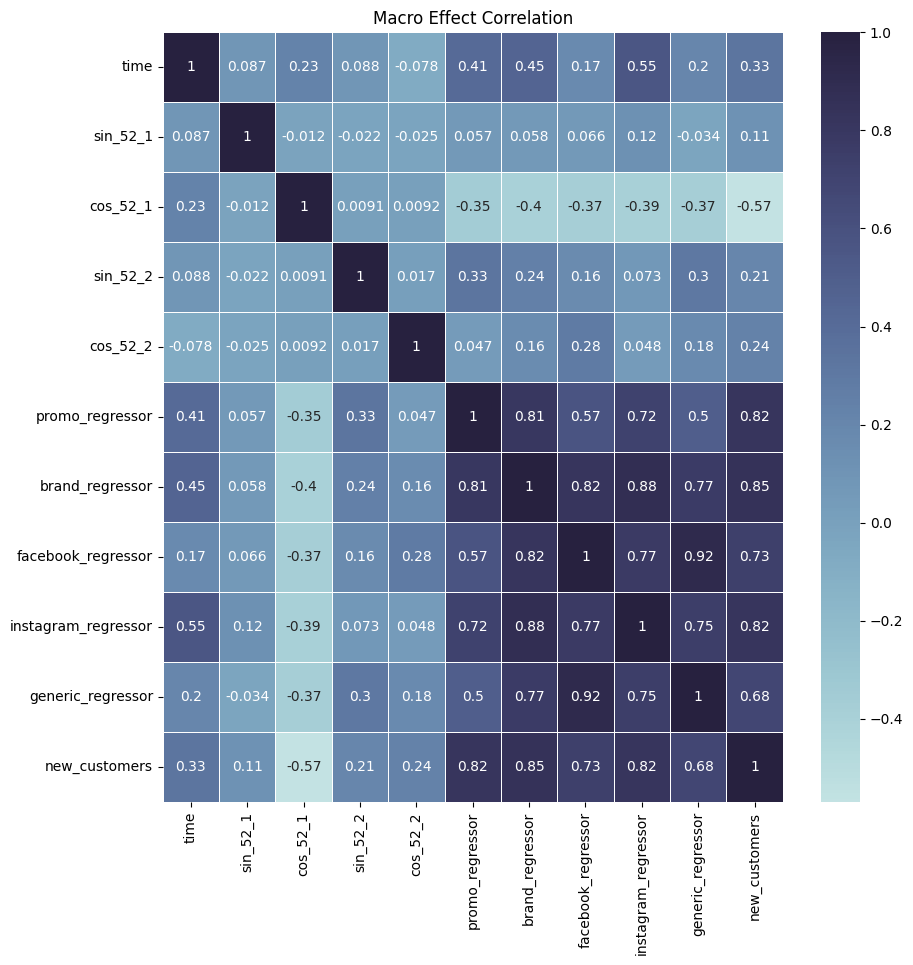

In [49]:
# Collinearity Inspection

plt.figure(figsize=(10, 10))
sns.heatmap(regression_df.to_pandas()[regressors + [target]].corr(), annot=True, cmap= sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True), linewidths=0.5)
plt.title('Macro Effect Correlation')
plt.show()